In [2]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_PL = df[(df['job_country']=='Poland')&(df['job_title_short']=='Data Analyst')]

In [ ]:
df_DA_PL['job_posted_month_no']=df_DA_PL['job_posted_date'].dt.month

In [6]:
df_DA_PL_explode=df_DA_PL.explode('job_skills')

In [12]:
df_DA_PL_pivot=df_DA_PL_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size',fill_value=0)

df_DA_PL_pivot.loc['Total']=df_DA_PL_pivot.sum()

df_DA_PL_pivot =df_DA_PL_pivot[df_DA_PL_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_PL_pivot=df_DA_PL_pivot.drop('Total')


In [20]:
DA_total=df_DA_PL.groupby('job_posted_month_no').size()


In [24]:
df_DA_PL_percent=df_DA_PL_pivot.div(DA_total/100, axis=0)

# changes month number to month name
df_DA_PL_percent = df_DA_PL_percent.reset_index()
df_DA_PL_percent['job_posted_month'] = df_DA_PL_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_PL_percent = df_DA_PL_percent.set_index('job_posted_month')
df_DA_PL_percent = df_DA_PL_percent.drop(columns='job_posted_month_no')

df_DA_PL_percent

job_skills,sql,excel,python,tableau,power bi,sap,r,azure,sas,vba,...,ibm cloud,groovy,react.js,redis,ggplot2,flutter,f#,couchbase,clickup,nltk
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,46.138614,36.237624,24.158416,22.574257,20.198020,10.297030,10.297030,10.297030,6.732673,6.336634,...,0.19802,0.000000,0.000000,0.19802,0.000000,0.000000,0.000000,0.19802,0.000000,0.000000
Feb,53.164557,35.696203,31.392405,22.025316,23.291139,13.164557,13.417722,8.354430,11.139241,10.632911,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Mar,50.000000,42.857143,31.547619,25.000000,21.726190,8.928571,11.904762,8.333333,11.904762,8.630952,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Apr,46.643110,36.042403,26.855124,25.441696,21.201413,11.307420,8.127208,7.420495,2.826855,8.480565,...,0.00000,0.000000,0.000000,0.00000,0.353357,0.353357,0.353357,0.00000,0.000000,0.000000
May,54.693878,39.183673,35.510204,19.591837,18.775510,10.204082,10.204082,10.204082,1.632653,6.938776,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Jun,42.583732,43.062201,26.794258,19.138756,20.574163,13.397129,11.004785,1.913876,7.655502,7.655502,...,0.00000,0.478469,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Jul,49.224806,41.085271,33.333333,24.418605,19.767442,12.403101,8.139535,4.651163,7.751938,6.976744,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Aug,49.032258,38.387097,24.193548,13.548387,21.935484,13.548387,7.741935,8.387097,10.322581,3.870968,...,0.00000,0.000000,0.322581,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Sep,50.000000,33.802817,33.098592,21.126761,14.788732,10.563380,9.859155,8.450704,4.225352,4.929577,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


Text(0.5, 0, '2023')

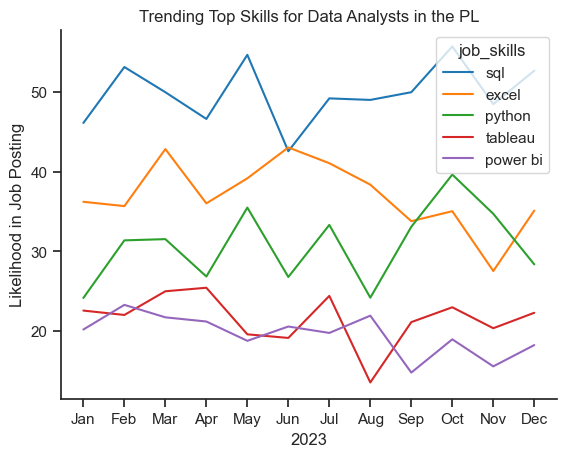

In [32]:
df_plot=df_DA_PL_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette="tab10")
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the PL')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
#plt.legend().remove()